In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [4]:
# copy demo into current directory
ac.copydemo('pen')

# start AUTO with runner object
runner = ra.runAUTO()

pgm = 'pen'

print( pgm, ": first run : locate a period doubling bifurcation" ) 
pen = ac.run(pgm,c='pen.1',runner=runner)

print( pgm, ": second run : a bifurcating branch of out-of-phase rotations" )
pen=pen + ac.run(pen('PD1'),c='pen.2',runner=runner)

print( pgm, ": third run : a secondary bifurcating branch (without bifurcation detection)" )
pen=pen + ac.run(pen('BP1'),c='pen.3',runner=runner)

print( pgm, ": fourth run : another secondary bifurcating branch (without bifurcation detection)" )
pen=pen + ac.run(pen('BP2'),c='pen.4',runner=runner)
ac.save(pen,'pen')

print( pgm, ": fifth run : generate starting data for period doubling continuation" )
t = ac.run(pen('PD1'),c='pen.5',runner=runner)

print( pgm, ": sixth run : compute a locus of period doubling bifurcations; restart from t" )
pd = ac.run(t,sv='pd',runner=runner)

Copying demo pen ... done
pen : first run : locate a period doubling bifurcation
gfortran -fopenmp -O -c pen.f90 -o pen.o
gfortran -fopenmp -O pen.o -o pen.exe /auto/lib/*.o
Starting pen ...

  BR    PT  TY  LAB    PAR(3)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)       PERIOD    
   1     1  EP    1   4.00000E-01   8.70694E+00   7.52355E+00   7.52355E+00   4.24583E+00   4.24583E+00   1.57388E+00
   1    34  PD    2   1.79163E-01   7.04803E+00   7.78673E+00   7.78673E+00   2.31669E+00   2.31669E+00   3.70528E+00
   1    66  UZ    3   1.27009E-01   6.90348E+00   9.28967E+00   9.28967E+00   1.99585E+00   1.99585E+00   3.00000E+01

 Total Time    0.154E+00
pen ... done
pen : second run : a bifurcating branch of out-of-phase rotations
Starting pen ...

  BR    PT  TY  LAB    PAR(3)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)       PERIOD    


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


   2    28  BP    4   3.31445E-01   1.06425E+01   1.02011E+01   1.43931E+01   3.62435E+00   3.62435E+00   9.72615E+00
   2    32  BP    5   1.75511E-01   9.77034E+00   1.03194E+01   1.33710E+01   2.73067E+00   2.73067E+00   1.34389E+01
   2    38  UZ    6   1.73146E-01   9.35712E+00   9.21742E+00   1.35358E+01   2.50950E+00   2.50950E+00   3.00002E+01

 Total Time    0.310E+00
pen ... done
pen : third run : a secondary bifurcating branch (without bifurcation detection)
Starting pen ...

  BR    PT  TY  LAB    PAR(3)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)       PERIOD    


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


   3    30  UZ    7   1.59953E-01   1.00160E+01   9.27295E+00   9.39837E+00   2.15834E+00   2.54935E+00   3.00005E+01

 Total Time    0.128E+00
pen ... done
pen : fourth run : another secondary bifurcating branch (without bifurcation detection)
Starting pen ...

  BR    PT  TY  LAB    PAR(3)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)       PERIOD    
   4    37  UZ    8   2.28614E-01   1.01461E+01   9.19297E+00   1.39347E+01   2.31834E+00   2.72148E+00   3.00000E+01

 Total Time    0.259E+00
pen ... done
Saving to b.pen, s.pen, and d.pen ... done
pen : fifth run : generate starting data for period doubling continuation
Starting pen ...


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



 Generating starting data : Restart at EP label below :

  BR    PT  TY  LAB    PAR(2)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)      PAR(3)         PERIOD    
   5     5  EP    9   9.99998E-02   7.04803E+00   7.78673E+00   7.78673E+00   2.31658E+00   2.31658E+00   1.79163E-01   3.70527E+00

 Total Time    0.129E+00
pen ... done
pen : sixth run : compute a locus of period doubling bifurcations; restart from t
Starting pen ...

  BR    PT  TY  LAB    PAR(2)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)      PAR(3)         PERIOD    
   5    19  UZ   10   9.80643E-01   6.63480E+00   8.15305E+00   8.15305E+00   1.62100E+00   1.62100E+00   9.57295E-01   2.99990E+01

 Total Time    0.110E+00
pen ... done
Saving to b.pd, s.pd, and d.pd ... done


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Created plot


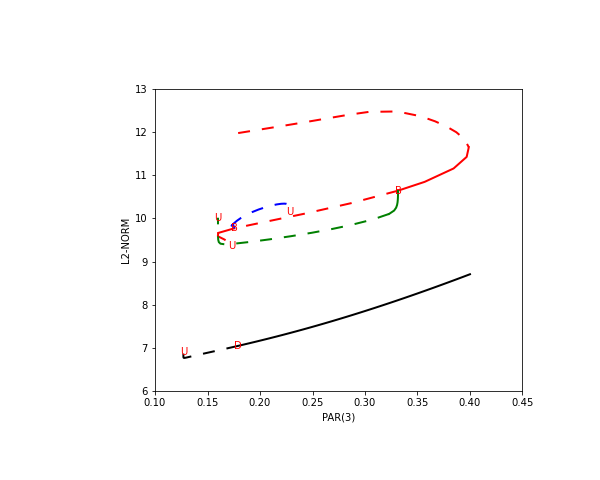

In [5]:
# plot bifurcation diagram using plot routine from AUTO

p = ac.plot('pen')
p.config(stability=True, grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

In [6]:
# clean up files

ac.clean()
ac.delete('pen')

Deleting fort.* *.o *.exe *.*~ ... done
Deleting b.pen ... done
Deleting s.pen ... done
Deleting d.pen ... done
